In [1]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from library import regulations
from library import analysis
from library import tables


In [2]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.year == 'yr1415']
data = data[data.eligible == True]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,412) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
reg_stars = {}
for reg in regulations.mainless:
    reg_stars[reg] = reg
    
df = analysis.create_count_proportion_df(data, list_of_regs = regulations.mainless, 
                                                dict_of_reg_labels = reg_stars)
df['stars'] = np.where(df['F-test p-value'] > .05, '', 
                  np.where((df['F-test p-value'] <= .05) & (df['F-test p-value'] > .01), '*', 
                      np.where((df['F-test p-value'] <= .01) & (df['F-test p-value'] > .001), '**', 
                          np.where((df['F-test p-value'] <= .001), '***',''))))
for reg in df.Regulation:
    reg_stars[reg] = df[df.Regulation == reg]['stars'].values[0]
reg_stars

{'reg25_0811': '',
 'reg25_081': '*',
 'reg25_0812': '',
 'reg25_082': '',
 'reg25_112': '',
 'reg25_111': '',
 'reg21_003': '',
 'reg21_102': '***',
 'reg21_401': '***',
 'reg21_352': '',
 'reg21_354': '',
 'reg25_092': '***',
 'reg37_0012': '***'}

In [4]:
p_exempt = data.groupby(['geography'])[regulations.mainless].mean()
p_exempt = p_exempt.reset_index()
order = {'Urban' : 3,
         'Suburban': 2,
         'Town': 1,
         'Rural': 0}
p_exempt['order'] = p_exempt['geography'].map(order)
p_exempt = p_exempt.sort_values(by= ['order'])
p_exempt = p_exempt.set_index('order')
p_exempt

,geography,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_111,reg21_003,reg21_102,reg21_401,reg21_352,reg21_354,reg25_092,reg37_0012
order,,,,,,,,,,,,,,
0,Rural,0.905956,0.470219,0.335423,0.238245,0.420063,0.147335,0.758621,0.435737,0.526646,0.178683,0.072100,0.188088,0.144201
1,Town,0.917431,0.348624,0.252294,0.197248,0.477064,0.155963,0.775229,0.417431,0.279817,0.215596,0.045872,0.261468,0.288991
2,Suburban,0.882353,0.379679,0.262032,0.144385,0.427807,0.176471,0.673797,0.304813,0.149733,0.213904,0.085561,0.363636,0.262032
3,Urban,0.921053,0.473684,0.263158,0.236842,0.368421,0.236842,0.710526,0.131579,0.052632,0.236842,0.078947,0.500000,0.394737


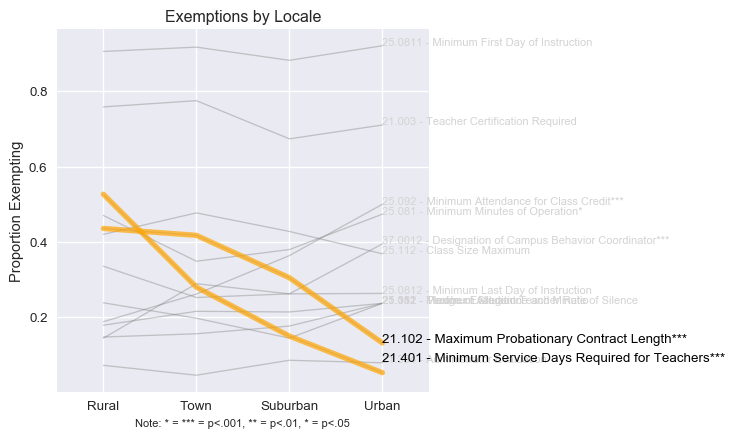

In [6]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['geography'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(-.5,3.5)

emphasize = ['reg21_102','reg21_401']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(3, p_exempt[reg][3] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    if reg == 'reg21_401':
        loc = p_exempt[reg][3] + .03
    else:
        loc = p_exempt[reg][3] 
    plt.plot(p_exempt['geography'], p_exempt[reg], marker='', color='orange', linewidth=4, alpha=0.7, label = 'label')
    plt.text(3, loc, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Locale')
plt.xlabel('Note: * = *** = p<.001, ** = p<.01, * = p<.05', size = 'small')

plt.savefig(table_path + 'spaghetti_geography_rural.png', bbox_inches="tight")



plt.show()

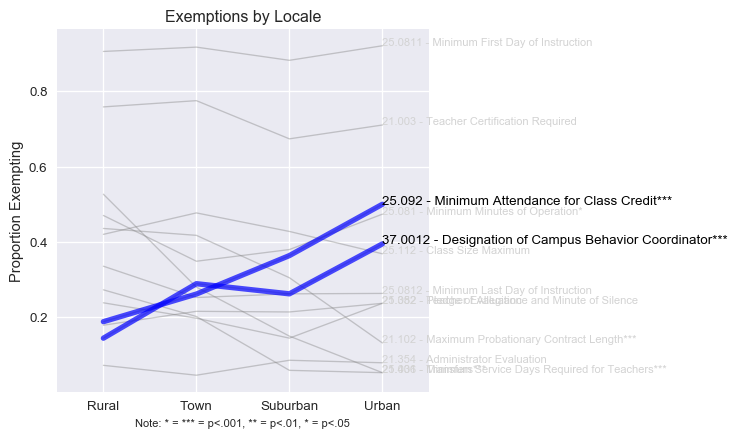

In [12]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['geography'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(-.5,3.5)

emphasize = ['reg37_0012', 'reg25_092']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(3, p_exempt[reg][3] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['geography'], p_exempt[reg], marker='', color='blue', linewidth=4, alpha=0.7, label = 'label')
    plt.text(3, p_exempt[reg][3], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.xlabel('Note: * = *** = p<.001, ** = p<.01, * = p<.05', size = 'small')
plt.title('Exemptions by Locale')

plt.savefig(table_path + 'spaghetti_geography_urban.png', bbox_inches="tight")

plt.show()